# Fussing with Slit Tracing [v1]

In [1]:
# imports
import os

from pypeit import traceslits

## To run this Notebook, you must have an environmental variable pointed at the PYPIT Development suite

### And you will need to have downloaded and unpacked the 'Cooked' set of files

In [2]:
print(os.getenv('PYPEIT_DEV'))

/Users/westfall/Work/packages/PypeIt-development-suite


----

## Checking edges

### Launch an RC Ginga viewer in your terminal
    ginga --modules=RC

### Point at a PYPIT MasterTrace frame

In [5]:
#mstrace_root = os.path.join(os.getenv('PYPEIT_DEV'), 'Cooked/Trace/MasterTrace_KeckLRISr_150420_402')
mstrace_root = os.path.join(os.getenv('PYPEIT_DEV'), 'REDUX_OUT/Keck_DEIMOS/830G_M/MF_keck_deimos/MasterTrace_A_01_aa')

### PYPYIT Script
    pypeit_chk_edges $PYPEIT_DEV/Cooked/Trace/MasterTrace_KeckLRISr_150420_402
    
#### The image and the traces should show in the Ginga viewer

### Using the TraceSlits class

#### Load

In [6]:
Tslits = traceslits.TraceSlits.from_master_files(mstrace_root)

[INFO]    :: Loading BPM from /Users/westfall/Work/packages/PypeIt-development-suite/REDUX_OUT/Keck_DEIMOS/830G_M/MF_keck_deimos/MasterTrace_A_01_aa.fits.gz


#### Show

In [7]:
Tslits.show('edges')

(4096, 2048)
(4096, 23)
[ -10.31732738   45.95960446  123.1876202   194.3887764   274.45494376
  368.43180627  463.68147599  595.07096463  822.23049669  963.86479406
 1064.65738292 1112.80301368 1253.98200408 1314.39057422 1389.63441944
 1449.30535713 1519.71504501 1587.86646196 1679.75719719 1757.12289113
 1814.52291032 1897.56725003 1970.52310146] [  42.109412    118.09188041  190.49650277  269.56899014  364.26622002
  459.09639664  590.97895716  778.938482    918.3100098  1060.63165285
 1109.36941993 1178.77728935 1310.95624805 1384.87947949 1445.18172386
 1513.82056635 1584.21729204 1674.13094541 1753.92879933 1809.32324301
 1891.22229195 1965.00123601 2041.86616759]
-10 42
45 118
123 190
194 269
274 364
368 459
463 590
595 778
822 918
963 1060
1064 1109
1112 1178
1253 1310
1314 1384
1389 1445
1449 1513
1519 1584
1587 1674
1679 1753
1757 1809
1814 1891
1897 1965
1970 2041


<IPython.core.display.Javascript object>


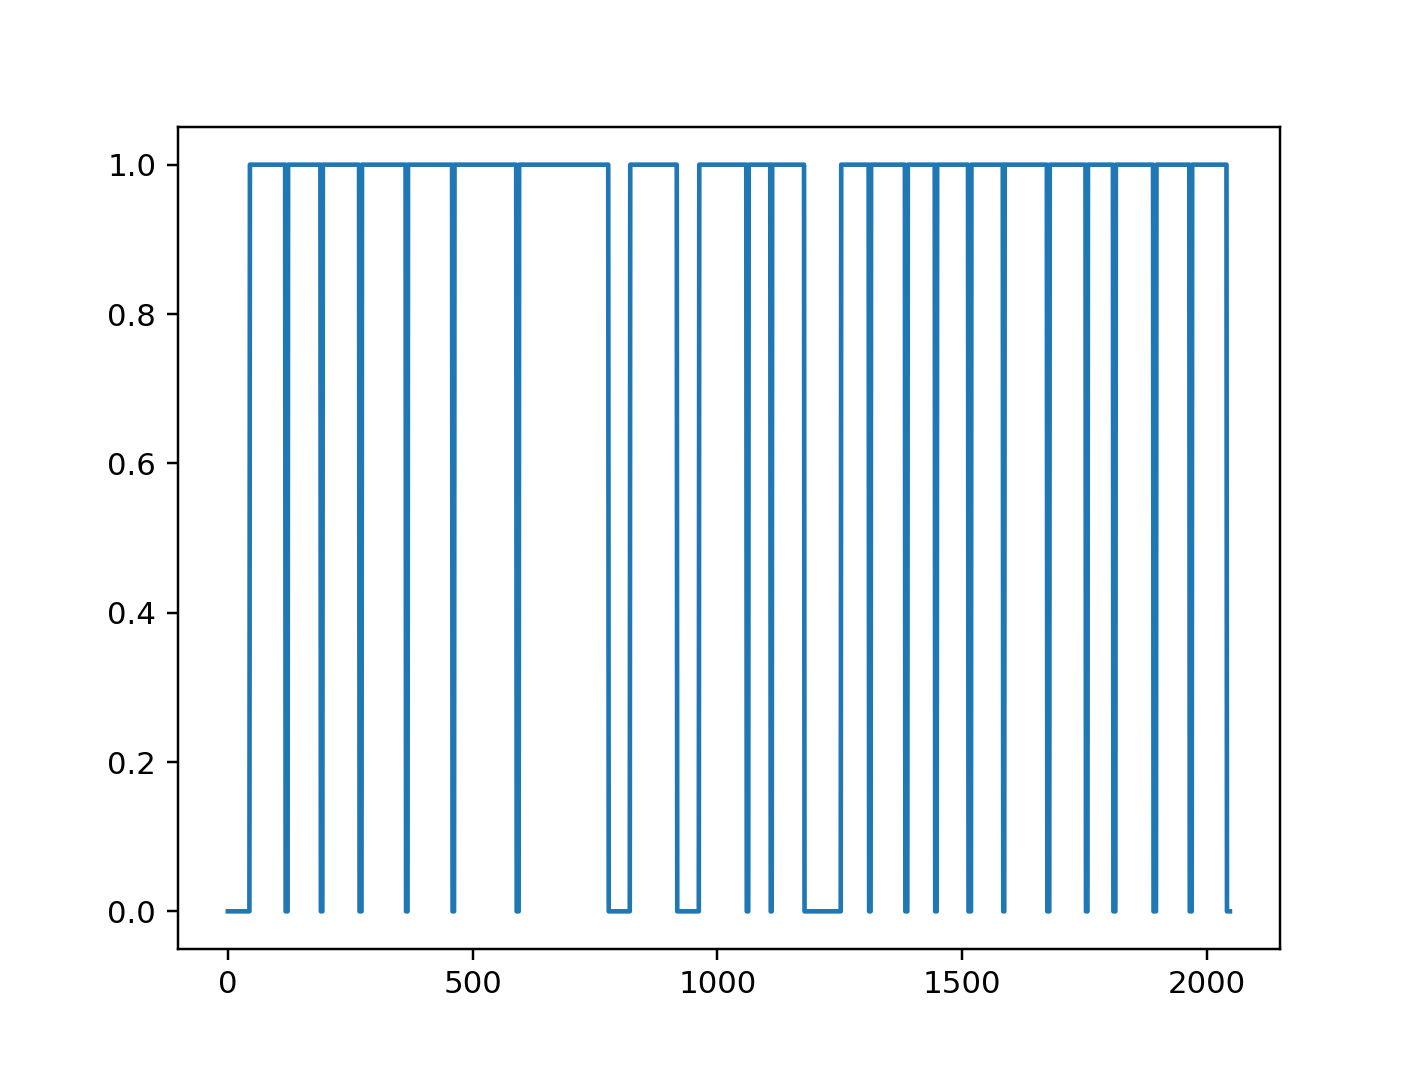

In [8]:
from matplotlib import pyplot
%matplotlib notebook
import numpy
print(Tslits.mstrace.shape)
print(Tslits.lcen.shape)
print(Tslits.lcen[1024,:], Tslits.rcen[1024,:])
slits = numpy.zeros(Tslits.mstrace.shape[1])
for l,r in zip(Tslits.lcen[1024,:], Tslits.rcen[1024,:]):
    print(int(l),int(r))
    slits[int(l):int(r)] += 1
pyplot.plot(slits)
#pyplot.imshow(numpy.ma.log10(Tslits.mstrace), origin='lower', interpolation='nearest')
#pyplot.plot(Tslits.rcen[0,:] - Tslits.lcen[0,:])


----

## Add a Slit
    There will be cases when one needs to manually add a slit
    This frame is missing a slit due to 2 alignment star boxes
    Here are ways to add one

### Internal (with the TraceSlits class)

In [ ]:
#  left edge, right edge, row on image
add_user_slits = [[489,563,1024]]

In [ ]:
# run_to_finish resets things in a proper manner
Tslits.add_user_slits(add_user_slits, run_to_finish=True)

In [ ]:
# check -- S11 is the new one
Tslits.show('edges')

In [ ]:
# write to disk (this will over-write so be careful)
new_root = os.path.basename(mstrace_root)+'_new'
Tslits.save_master(new_root)

### PYPIT script (coming someday, especially if requested)

----

## Remove a slit
    There are edge cases (e.g. ghost images) that lead to erroneous slits
    Here is a way to remove one

### Internal

In [ ]:
# Frame with extra slit
mstrace_root2 = os.getenv('PYPIT_DEV')+'Cooked/Trace/MasterTrace_KeckLRISr_20160110_A'

In [ ]:
# Load
Tslits2 = traceslits.TraceSlits.from_master_files(mstrace_root2)

In [ ]:
# Show
Tslits2.show('edges')

In [ ]:
# Setup slit to remove --  xleft, yleft at yrow=nrow/2
rm_slits = [[229, 380]]

In [ ]:
# Remove
Tslits2.remove_slit(rm_slits)

In [ ]:
# Check
Tslits2.show('edges')

In [ ]:
# write to disk (this will over-write so be careful)
new_root2 = os.path.basename(mstrace_root2)+'_new'
Tslits.save_master(new_root2)

----

## Re-run Tracing (only recommended for Developers)

In [ ]:
mstrace_root3 = os.getenv('PYPIT_DEV')+'Cooked/Trace/MasterTrace_KeckLRISr_20160110_A'

### Load

In [ ]:
Tslits2 = traceslits.TraceSlits.from_master_files(mstrace_root3)

### Run

In [ ]:
tslit_dict = Tslits2.run()

In [ ]:
tslit_dict